In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 2
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.1
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[2_10_51_300_0.1_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[2_10_51_300_0.1_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	634189656.7967

Best Fitness:	117875925.1374
Solution:	200.0000
Diff:		117875725.1374

[0:01:20][----------] 1.96% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	850725824.2560

Best Fitness:	228762057.6691
Solution:	200.0000
Diff:		228761857.6691

[0:02:07][----------] 3.92% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	655676565.0176

Best Fitness:	98873437.8123
Solution:	200.0000
Diff:		98873237.8123

[0:02:49][#---------] 5.88% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	557426137.6584

Best Fitness:	135172675.5309
Solution:	200.0000
Diff:		135172475.5309

[0:03:26][#---------] 7.84% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	667834925.2661

Best Fitness:	165400927.5720
Solution:	200.0000
Diff:		165400727.5720

[0:04:16][#---------] 9.80% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	541994260.2215

Best Fitness:	105341879.3601
Solution:	200.0000
Diff:		105341679.3601

[0:05:06][#---------] 11.76% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	673035865.3659

Best Fitness:	165505967.2381
Solution:	200.0000
Diff:		165505767.2381

[0:05:52][#---------] 13.73% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	678689502.6036

Best Fitness:	195678979.4655
Solution:	200.0000
Diff:		195678779.4655

[0:06:41][##--------] 15.69% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1065953703.3799

Best Fitness:	187506462.6877
Solution:	200.0000
Diff:		187506262.6877

[0:07:26][##--------] 17.65% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	566686806.6218

Best Fitness:	107636772.0933
Solution:	200.0000
Diff:		107636572.0933

[0:08:03][##--------] 19.61% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	670928917.0526

Best Fitness:	213392431.4862
Solution:	200.0000
Diff:		213392231.4862

[0:08:50][##--------] 21.57% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	672108901.6612

Best Fitness:	220953338.2553
Solution:	200.0000
Diff:		220953138.2553

[0:09:39][##--------] 23.53% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	583936678.3843

Best Fitness:	130257043.8544
Solution:	200.0000
Diff:		130256843.8544

[0:10:19][###-------] 25.49% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	767413688.1785

Best Fitness:	165754155.5190
Solution:	200.0000
Diff:		165753955.5190

[0:10:59][###-------] 27.45% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	717752678.8819

Best Fitness:	172295721.7593
Solution:	200.0000
Diff:		172295521.7593

[0:11:44][###-------] 29.41% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	631701428.7979

Best Fitness:	174600601.7927
Solution:	200.0000
Diff:		174600401.7927

[0:12:35][###-------] 31.37% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	527760591.7203

Best Fitness:	130750797.2513
Solution:	200.0000
Diff:		130750597.2513

[0:13:11][###-------] 33.33% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	787594500.8327

Best Fitness:	203273411.3456
Solution:	200.0000
Diff:		203273211.3456

[0:14:03][####------] 35.29% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	672099121.2432

Best Fitness:	142004673.3444
Solution:	200.0000
Diff:		142004473.3444

[0:14:49][####------] 37.25% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	760435643.5917

Best Fitness:	169213811.3814
Solution:	200.0000
Diff:		169213611.3814

[0:15:36][####------] 39.22% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	547381705.7888

Best Fitness:	119645972.1171
Solution:	200.0000
Diff:		119645772.1171

[0:16:21][####------] 41.18% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	673416680.7362

Best Fitness:	177735614.4300
Solution:	200.0000
Diff:		177735414.4300

[0:17:05][####------] 43.14% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	632562419.9214

Best Fitness:	221383422.0011
Solution:	200.0000
Diff:		221383222.0011

[0:17:42][#####-----] 45.10% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	520990535.0145

Best Fitness:	94755211.9209
Solution:	200.0000
Diff:		94755011.9209

[0:18:17][#####-----] 47.06% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	741937545.9535

Best Fitness:	179095691.2701
Solution:	200.0000
Diff:		179095491.2701

[0:18:59][#####-----] 49.02% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	689322153.6270

Best Fitness:	134862626.2703
Solution:	200.0000
Diff:		134862426.2703

[0:19:33][#####-----] 50.98% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	762489851.4243

Best Fitness:	113624310.6671
Solution:	200.0000
Diff:		113624110.6671

[0:20:10][#####-----] 52.94% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	610490632.3409

Best Fitness:	151607937.6341
Solution:	200.0000
Diff:		151607737.6341

[0:20:46][#####-----] 54.90% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1009975142.3945

Best Fitness:	268948461.2027
Solution:	200.0000
Diff:		268948261.2027

[0:21:30][######----] 56.86% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	815399449.3279

Best Fitness:	198696768.1744
Solution:	200.0000
Diff:		198696568.1744

[0:22:07][######----] 58.82% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	568025468.3733

Best Fitness:	95120553.8079
Solution:	200.0000
Diff:		95120353.8079

[0:22:48][######----] 60.78% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	891924377.6741

Best Fitness:	189822147.9456
Solution:	200.0000
Diff:		189821947.9456

[0:23:33][######----] 62.75% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	867240676.6031

Best Fitness:	198414731.6289
Solution:	200.0000
Diff:		198414531.6289

[0:24:11][######----] 64.71% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	656361334.4429

Best Fitness:	174307862.8940
Solution:	200.0000
Diff:		174307662.8940

[0:25:01][#######---] 66.67% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	497049734.6255

Best Fitness:	92899141.4343
Solution:	200.0000
Diff:		92898941.4343

[0:25:44][#######---] 68.63% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	770494115.6203

Best Fitness:	117042302.5806
Solution:	200.0000
Diff:		117042102.5806

[0:26:17][#######---] 70.59% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	621466751.2491

Best Fitness:	91117432.6763
Solution:	200.0000
Diff:		91117232.6763

[0:26:51][#######---] 72.55% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	608130852.5587

Best Fitness:	98978749.5651
Solution:	200.0000
Diff:		98978549.5651

[0:27:33][#######---] 74.51% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	751413049.0213

Best Fitness:	169169154.6782
Solution:	200.0000
Diff:		169168954.6782

[0:28:07][########--] 76.47% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	642283675.6911

Best Fitness:	81910580.7590
Solution:	200.0000
Diff:		81910380.7590

[0:28:43][########--] 78.43% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	555529770.4447

Best Fitness:	58119738.7013
Solution:	200.0000
Diff:		58119538.7013

[0:29:36][########--] 80.39% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	569700988.5914

Best Fitness:	140344920.8089
Solution:	200.0000
Diff:		140344720.8089

[0:30:14][########--] 82.35% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	970498956.8418

Best Fitness:	117728488.9149
Solution:	200.0000
Diff:		117728288.9149

[0:30:57][########--] 84.31% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	635230224.3173

Best Fitness:	166832043.2728
Solution:	200.0000
Diff:		166831843.2728

[0:31:43][#########-] 86.27% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	675338702.8624

Best Fitness:	75295195.0505
Solution:	200.0000
Diff:		75294995.0505

[0:32:19][#########-] 88.24% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	608721904.9110

Best Fitness:	110128435.8037
Solution:	200.0000
Diff:		110128235.8037

[0:32:55][#########-] 90.20% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	686553530.4752

Best Fitness:	135010630.8285
Solution:	200.0000
Diff:		135010430.8285

[0:33:33][#########-] 92.16% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	864531127.0810

Best Fitness:	200658417.1090
Solution:	200.0000
Diff:		200658217.1090

[0:34:16][#########-] 94.12% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	749306652.8302

Best Fitness:	105368732.7552
Solution:	200.0000
Diff:		105368532.7552

[0:34:56][##########] 96.08% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	738448489.2634

Best Fitness:	189218595.0381
Solution:	200.0000
Diff:		189218395.0381

[0:35:34][##########] 98.04% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	759035279.9220

Best Fitness:	204482492.4631
Solution:	200.0000
Diff:		204482292.4631

[0:36:15][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

0:36:15

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
27,3.372636e+08,1.303809e+09,1.444276e+09,6.769561e+08,7.096844e+08,8.821719e+08,2.194854e+09,1.505775e+09,1.216186e+09,1.298921e+09,...,1.534978e+09,1.215467e+09,1.346709e+09,1.430640e+09,7.080487e+08,1.057958e+09,7.617847e+08,6.985891e+08,1.509886e+09,50
28,3.372636e+08,1.303809e+09,1.444276e+09,6.769561e+08,7.096844e+08,8.821719e+08,2.194854e+09,1.505775e+09,1.216186e+09,1.298921e+09,...,1.534978e+09,1.215467e+09,1.009670e+09,1.430640e+09,7.080487e+08,1.057958e+09,7.617847e+08,6.985891e+08,6.537375e+08,50
29,3.372636e+08,1.303809e+09,1.444276e+09,6.096476e+08,7.096844e+08,8.821719e+08,1.817001e+09,1.505775e+09,8.624757e+08,1.242345e+09,...,1.534978e+09,1.215467e+09,1.009670e+09,1.430640e+09,4.270569e+08,9.017483e+08,7.617847e+08,6.985891e+08,3.902781e+08,50
30,3.372636e+08,1.303809e+09,1.444276e+09,6.096476e+08,7.096844e+08,8.821719e+08,1.780056e+09,6.662575e+08,8.624757e+08,1.242345e+09,...,1.235133e+09,1.215467e+09,1.009670e+09,1.430640e+09,4.270569e+08,9.017483e+08,7.617847e+08,6.985891e+08,3.902781e+08,50
31,3.372636e+08,3.758917e+08,1.444276e+09,6.096476e+08,7.096844e+08,8.821719e+08,8.104887e+08,5.926982e+08,7.928921e+08,1.242345e+09,...,1.235133e+09,6.909274e+08,8.031499e+08,1.430640e+09,4.270569e+08,9.017483e+08,7.617847e+08,6.985891e+08,3.902781e+08,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 117875725.13744819

Best error for run 1: 228761857.6691462

Best error for run 2: 98873237.81227009

Best error for run 3: 135172475.53087476

Best error for run 4: 165400727.5719878

Best error for run 5: 105341679.36009413

Best error for run 6: 165505767.2381422

Best error for run 7: 195678779.46550816

Best error for run 8: 187506262.68766809

Best error for run 9: 107636572.09327915

Best error for run 10: 213392231.48617315

Best error for run 11: 220953138.25528216

Best error for run 12: 130256843.85438973

Best error for run 13: 165753955.51897338

Best error for run 14: 172295521.75933927

Best error for run 15: 174600401.7926844

Best error for run 16: 130750597.2512509

Best error for run 17: 203273211.34558687

Best error for run 18: 142004473.34440824

Best error for run 19: 169213611.3813657

Best error for run 20: 119645772.11705494

Best error for run 21: 177735414.42996225

Best error for run 22: 221383222.00112024

Best error for run 23: 94755011.92091191

Best error for run 24: 179095491.2701065

Best error for run 25: 134862426.27026337

Best error for run 26: 113624110.66713981

Best error for run 27: 151607737.63411683

Best error for run 28: 268948261.20268697

Best error for run 29: 198696568.17439252

Best error for run 30: 95120353.8079253

Best error for run 31: 189821947.9455614

Best error for run 32: 198414531.62886012

Best error for run 33: 174307662.89400077

Best error for run 34: 92898941.43427964

Best error for run 35: 117042102.58062285

Best error for run 36: 91117232.67627147

Best error for run 37: 98978549.56513007

Best error for run 38: 169168954.67819712

Best error for run 39: 81910380.75900884

Best error for run 40: 58119538.701343626

Best error for run 41: 140344720.80893922

Best error for run 42: 117728288.91486199

Best error for run 43: 166831843.27284923

Best error for run 44: 75294995.05047256

Best error for run 45: 110128235.80367649

Best error for run 46: 135010430.8284716

Best error for run 47: 200658217.10898504

Best error for run 48: 105368532.7552491

Best error for run 49: 189218395.03808522

Best error for run 50: 204482292.4630927

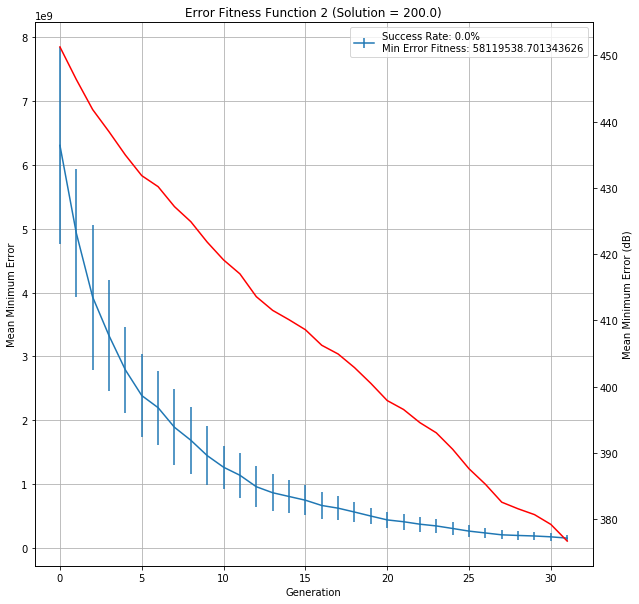

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[2_10_51_300_0.1_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,2,10,0.1,1.178757e+08,2.287619e+08,9.887324e+07,1.351725e+08,1.654007e+08,1.053417e+08,...,7.529500e+07,1.101282e+08,1.350104e+08,2.006582e+08,1.053685e+08,1.892184e+08,2.044823e+08,1.510307e+08,0:36:15,10200
